# Star Detection and Localization

## Importing Libraries

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## Load Image

In [12]:
with open('input1.txt', 'r') as f:
    lines = f.readlines()
    w, h, c = [int(i) for i in lines[0].replace('\n', '').split()]
    lines = lines[1:]
pixels = []
for i in range(w):
  curr_pixels = []

  line = lines[i]
  filtered_line = ''.join(char for char in line if char.isdigit() or char == ' ')
  line = filtered_line.split()
  for j in range(h):
    curr_pixels.append((line[3 * j], line[3 * j + 1], line[3 * j + 2]))
  pixels.append(curr_pixels)

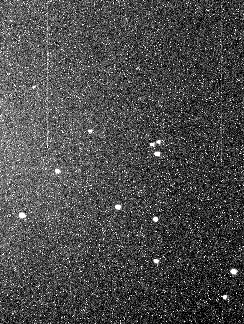

In [13]:
image = np.array(pixels, dtype=np.uint8)
cv2_imshow(image)

## Detecting and Highlighting Stars in an Image

Number of stars: 15
Star coordinates: [(224, 296), (232, 271), (155, 260), (2, 253), (155, 218), (21, 215), (117, 206), (56, 170), (156, 153), (151, 144), (158, 141), (89, 130), (62, 131), (33, 86), (47, 53)]


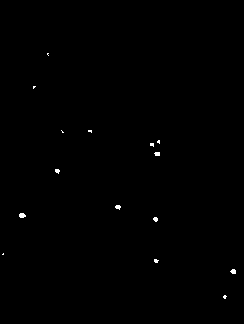

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresholded = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

star_coordinates = []
star_mask = np.zeros_like(image)

for contour in contours:
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        star_coordinates.append((cx, cy))
        cv2.drawContours(star_mask, [contour], -1, (255, 255, 255), -1)
print(f'Number of stars: {len(star_coordinates)}')
print(f'Star coordinates: {star_coordinates}')
cv2_imshow(star_mask)